# Random Forest Model: Predicting one of three ranks

This RF model takes attributes we consider correlated to the output rank as features and predict the housing quality  ranks. Quality is ranked from highest 3 to least 1 depending on the constructing material. 

The RF model can predict floor, wall, or roof rank with given the other two variables. 

### Imports

In [1]:
import pandas as pd

### Install seaborn to plot heatmap 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sn
from Functions import Load_Data, Ranking, Shuffle_Redistribute, Train_Test_Split

In [3]:
#Load housing_data
df = Load_Data('housing_data.csv')

Runtime:5.58 sec


In [4]:
#dataframe with na in any row
withna = df[df.isnull().any(axis=1)]

#drop missing data
df = df.dropna()

In [5]:
#view the attributes used
df.head()

,int_year,housing_roof_num,housing_wall_num,housing_floor_num,iso3
0,2010,99,33,41,AFG
1,2010,96,21,96,AFG
2,2010,96,21,13,AFG
3,2010,96,11,11,AFG
4,2010,96,11,32,AFG


### Set label
select output 

In [6]:
#Label variable
LABEL = 'roof'

In [7]:
#filter out special characters within number columns, and convert numbers from string to int
#Then keep values within [1,35], cause the values out of this set is considered as missing values
#rank all three categories
vals = ['roof','wall','floor']
#Clean and Rank function
df = Ranking(df, vals)

/Users/kevinhsu/Documents/CSE583/RF/Functions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[val+'_rank'] = (df['housing_'+val+'_num']/10).apply(np.floor)
/Users/kevinhsu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/kevinhsu/Documents/CSE583/RF/Functions.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [8]:
#view data at this point
df.head()

,int_year,housing_roof_num,housing_wall_num,housing_floor_num,iso3,roof_rank,wall_rank,floor_rank
8,2010,23,13,11,AFG,2.0,1.0,1.0
9,2010,23,12,11,AFG,2.0,1.0,1.0
10,2010,34,31,34,AFG,3.0,3.0,3.0
12,2010,34,33,34,AFG,3.0,3.0,3.0
13,2010,34,33,33,AFG,3.0,3.0,3.0


### Obtain the list of features we use for training

In [9]:
#list features
features = list(df)
features.remove('housing_'+LABEL+'_num')
features.remove(LABEL+'_rank')

### Shuffle the data set and redistribute 
Unbiase the data set by shuffling the rows and evenly distribute the data from each rank

In [10]:
new_df = Shuffle_Redistribute(df, LABEL, Redistribute=True)

/Users/kevinhsu/Documents/CSE583/RF/Functions.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rank['rand_num'] = np.random.uniform(0,1, len(rank))


In [11]:
new_df.head()

,int_year,housing_roof_num,housing_wall_num,housing_floor_num,iso3,roof_rank,wall_rank,floor_rank
0,2011,23,31,35,AFG,2.0,3.0,3.0
1,2015,12,12,11,MOZ,1.0,1.0,1.0
2,2012,12,21,11,PAK,1.0,2.0,1.0
3,2011,23,35,11,PAK,2.0,3.0,1.0
4,2014,21,32,34,KEN,2.0,3.0,3.0


In [12]:
# distribution of data set based on label 
rank_dist = new_df.groupby(LABEL+'_rank').size().tolist()


In [13]:
rank_dist

[70357, 70312, 70072]

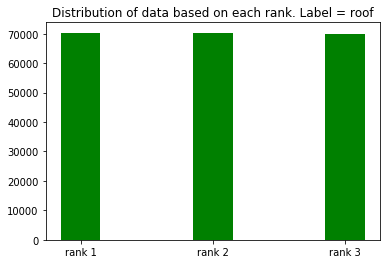

In [14]:
name = ['rank 1','rank 2','rank 3']
plt.bar(name,rank_dist,width=0.3, color = 'g')
plt.title('Distribution of data based on each rank. Label = '+LABEL)
plt.show()

### Train and test set splitting

In [15]:
train, test = Train_Test_Split(new_df)

#feature set of train and test data
X_train = train[features]
X_test = test[features]

#Label of train and test data
Y_train = train[LABEL+'_rank'].values.astype(int)
Y_test = test[LABEL+'_rank'].values.astype(int)

### Building Model

In [16]:
#build model
RFC = RandomForestClassifier(n_estimators=17 , random_state=0, max_features=2, oob_score=True)

#data fitting
RFC.fit(X_train, Y_train)

/Users/kevinhsu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/kevinhsu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

### Test Model 

In [17]:
#test model
Pred_test = RFC.predict(X_test)   
Pred_train = RFC.predict(X_train)

test_score = accuracy_score(Y_test, Pred_test)
train_score = accuracy_score(Y_train, Pred_train)
print('Train set Accuracy score:{:.2f}%'.format(train_score*100))
print('Test set Accuracy score:{:.2f}%'.format(test_score*100))

Train set Accuracy score:73.62%
Test set Accuracy score:70.49%


### Plot the heat map of the prediction result

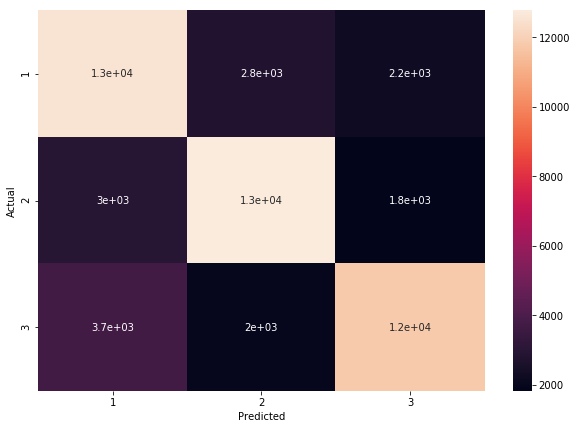

In [18]:
#confusion matrix 
conf_matrix = pd.crosstab(Y_test, Pred_test, rownames=['Actual'], colnames=['Predicted'])

#plot heatmap
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True)
plt.show()

### Overall classification result

In [19]:
target_names = ['rank 1', 'rank 2', 'rank 3']
print(classification_report(Y_test, Pred_test, target_names=target_names))

             precision    recall  f1-score   support

     rank 1       0.65      0.71      0.68     17569
     rank 2       0.73      0.73      0.73     17568
     rank 3       0.74      0.67      0.71     17502

avg / total       0.71      0.70      0.71     52639

